In [35]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#@title Task 01

#A and B

dataset1 = pd.read_csv('/Lab2 D1A.csv')
dataset2 = pd.read_csv('/Lab2 D1B.csv')
c1 = dataset1.merge(dataset2,how='inner')
c1 = c1.drop_duplicates()
print(c1.columns)
print(c1.shape)

Index(['fid', 'name', 'population', 'county', 'latitude', 'longitude', 'level',
       'enrollment', 'level.1'],
      dtype='object')
(27033, 9)


In [37]:
#C

dataset3 = pd.read_csv('/Lab2 D1C.csv')
comboAC = dataset1.merge(dataset3,how='inner')
print(comboAC.columns)
print(comboAC.shape)

Index(['fid', 'name', 'population', 'county', 'latitude', 'city', 'score'], dtype='object')
(4221333, 7)


In [38]:
#@title Task 02

#A
customizedDataset = pd.DataFrame({
    'fid': range(1, 11),
    'name': ['Sajad', 'Umar', 'Hasan', 'Mustafa', 'Ibtesam', 'Shaheer', 'Umar', 'Ali', 'Ibrahim', 'Safey'],
    'score': np.random.uniform(0, 100, 10),
    'Size': ['small', 'medium', 'high','small', 'medium', 'high','small', 'medium','small', 'medium'],
    'Cardinal Direction': np.random.choice(['North', 'South', 'East', 'West'], 10),
    'Timings': np.random.choice(['full time', 'part time'], 10),
    'Category': np.random.choice(['A', 'B', 'C'], 10),
    'Department': ['AI', 'CS', 'CY', 'SE', 'DS', 'AI', 'CS', 'CY', 'SE', 'DS']
})

print(customizedDataset)

   fid     name      score    Size Cardinal Direction    Timings Category  \
0    1    Sajad  83.788402   small              South  part time        A   
1    2     Umar  22.909921  medium              South  full time        B   
2    3    Hasan  86.080765    high               West  full time        A   
3    4  Mustafa  44.006248   small               West  full time        C   
4    5  Ibtesam  21.045135  medium               East  full time        B   
5    6  Shaheer  76.300862    high               West  part time        B   
6    7     Umar  63.054019   small               East  full time        C   
7    8      Ali  49.512049  medium              North  part time        C   
8    9  Ibrahim  60.535171   small               West  part time        B   
9   10    Safey  18.427682  medium              North  part time        A   

  Department  
0         AI  
1         CS  
2         CY  
3         SE  
4         DS  
5         AI  
6         CS  
7         CY  
8         SE  
9 

In [39]:
#B

modifiedD1 = pd.merge(customizedDataset, dataset1, how='inner')
modifiedD2 = pd.merge(customizedDataset, dataset2, how='inner')
modifiedD3 = pd.merge(customizedDataset, dataset3, how='inner')

modifiedData = pd.concat([modifiedD1, modifiedD2, modifiedD3], ignore_index=True)

print('==============================Before Merging==============================\n\n')
print("Number of Records:", len(customizedDataset))
print("Number of Features:", len(customizedDataset.columns))

print('==============================After Merging==============================\n\n')
print("\nNumber of Records:", len(modifiedData))
print("Number of Features:", len(modifiedData.columns))

==============================Before Merging==============================


Number of Records: 10
Number of Features: 8
==============================After Merging==============================



Number of Records: 0
Number of Features: 16


<ipython-input-39-13d739d8bb94>:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  modifiedD3 = pd.merge(customizedDataset, dataset3, how='inner')


In [40]:
#@title Task 03

#A
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from imblearn.over_sampling import RandomOverSampler

In [41]:
#B
df = pd.read_csv('/train.csv')
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [42]:
#C
variables = ['var3', 'var38', 'var15', 'imp_op_var39_comer_ult1']
correlation_matrix = df[variables].corr()

print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                              var3     var38     var15  imp_op_var39_comer_ult1
var3                     1.000000  0.000071 -0.004452                 0.005989
var38                    0.000071  1.000000  0.006497                 0.012546
var15                   -0.004452  0.006497  1.000000                 0.094762
imp_op_var39_comer_ult1  0.005989  0.012546  0.094762                 1.000000


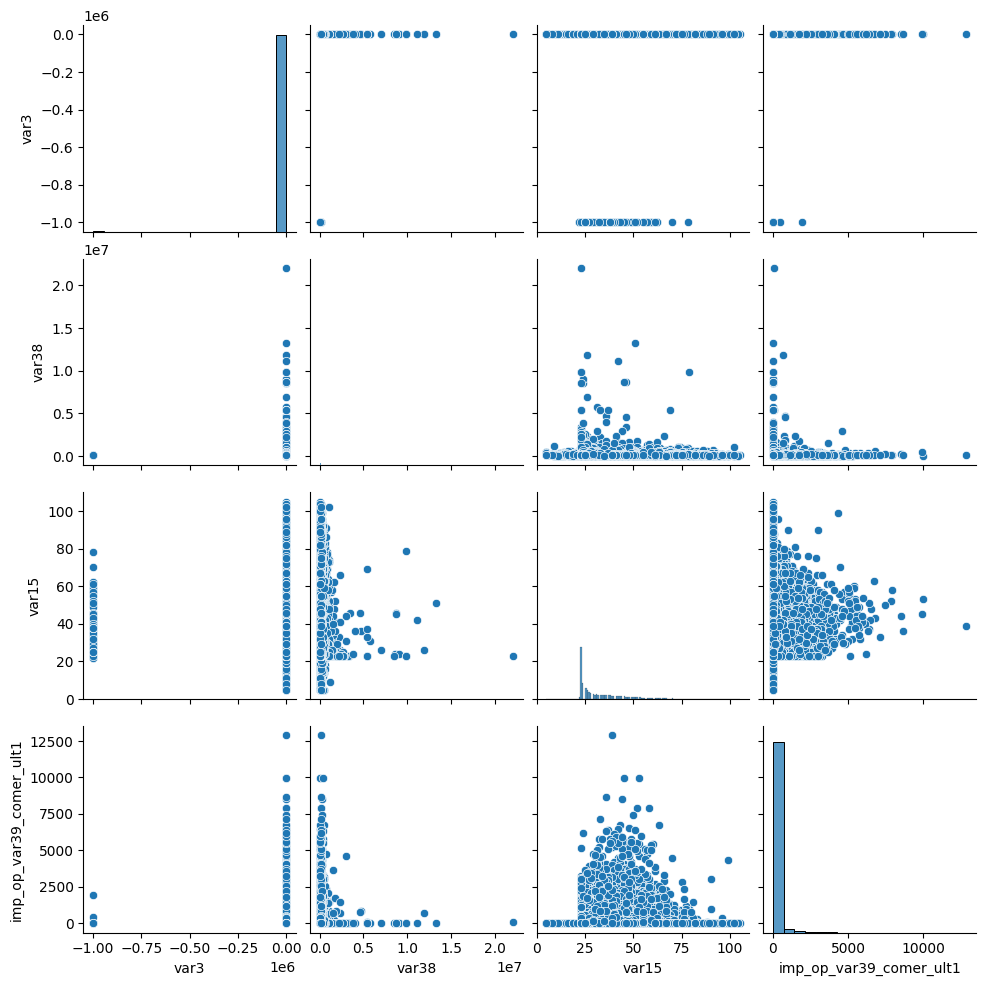

In [43]:
#D

sns.pairplot(df[variables])
plt.show()

 #The pairplot indicates that the relationships between `Var3`, `Var38`,--
 # --`Var15`, and `imp_op_var39_comer_ult1` are not strongly linear.
 #The data points are scattered and don't follow a clear linear pattern,--
 #-- suggesting that any relationships are likely non-linear or weak.

In [44]:
# E

missingValues = df.isnull().sum()
print("Missing values in each column:\n", missingValues)

imputer = SimpleImputer(strategy='mean')
imputedDataset = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nMissing Values After Imputation:\n", imputedDataset.isnull().sum())


Missing values in each column:
 ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

Missing Values After Imputation:
 ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64


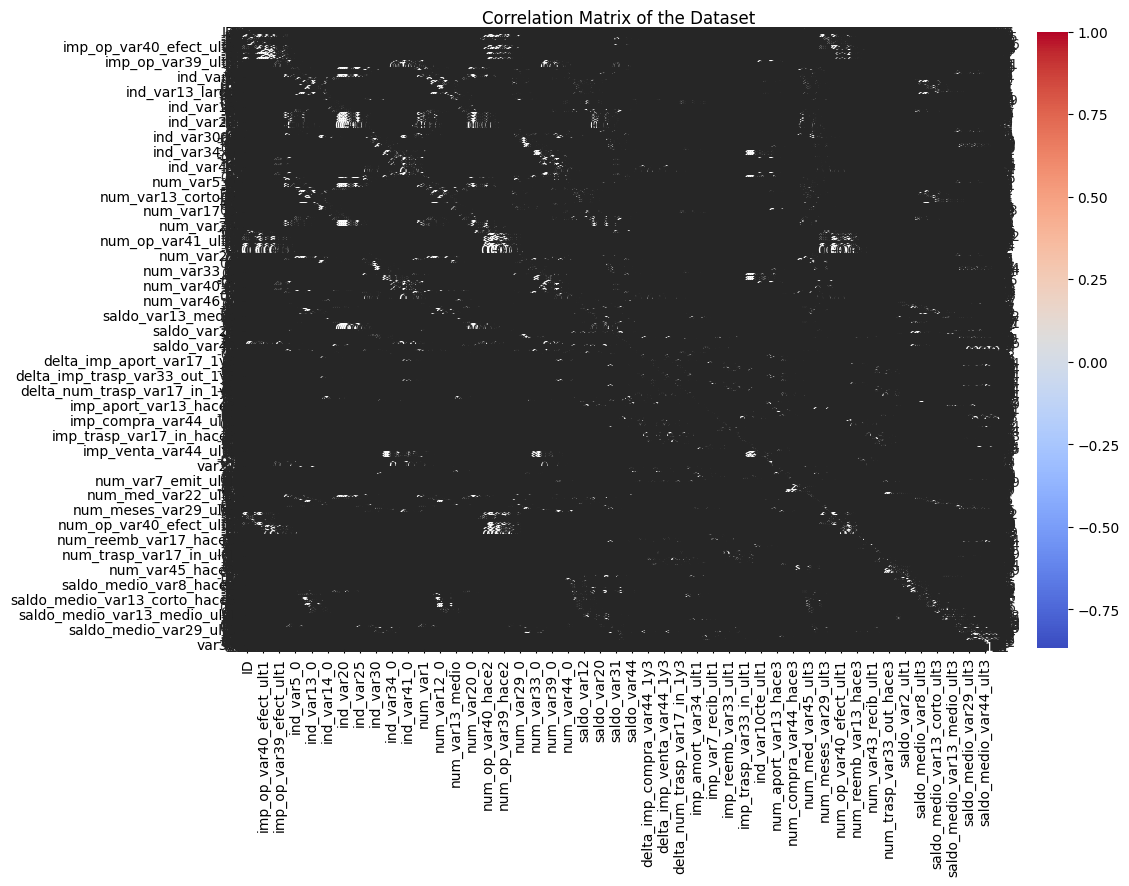

In [45]:
# F

plt.figure(figsize=(12, 8))
sns.heatmap(imputedDataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of the Dataset')
plt.show()

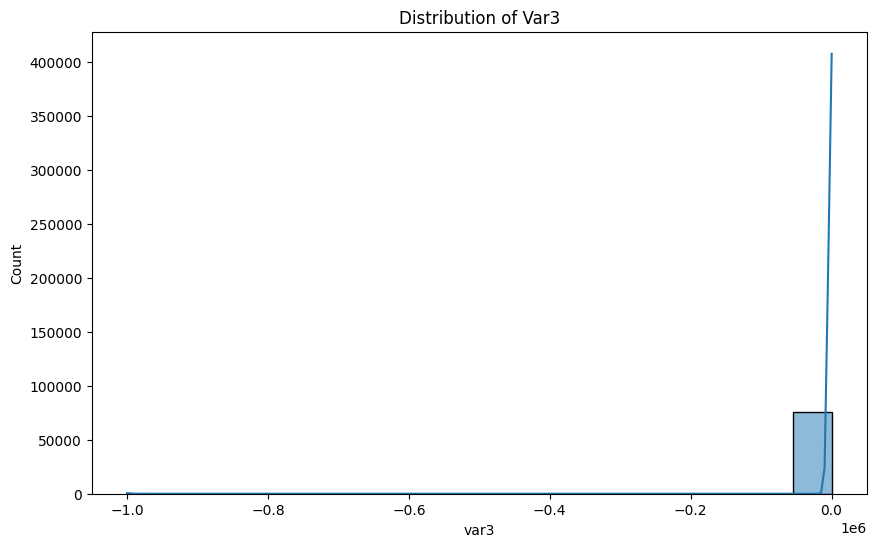

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(imputedDataset['var3'], kde=True)
plt.title('Distribution of Var3')
plt.show()

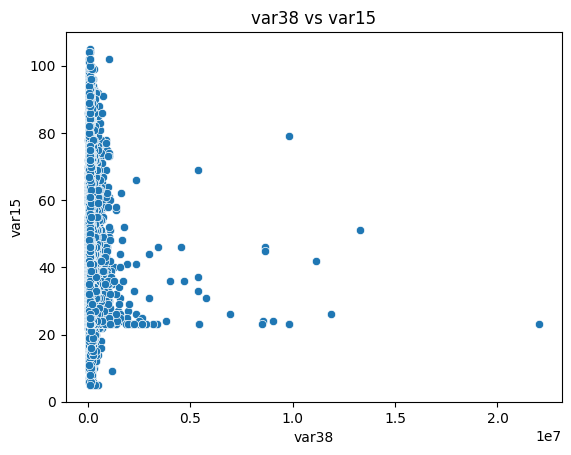

In [47]:
sns.scatterplot(x='var38', y='var15', data=imputedDataset)
plt.title('var38 vs var15')
plt.show()

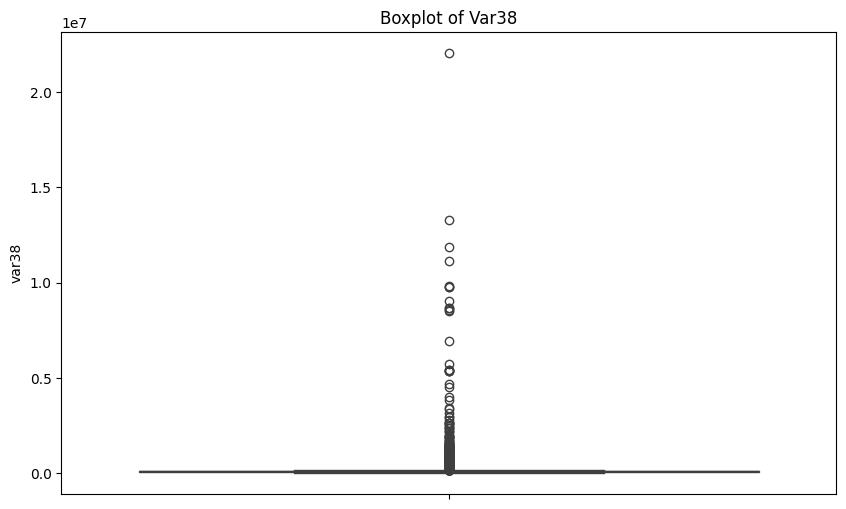

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='var38', data=imputedDataset)
plt.title('Boxplot of Var38')
plt.show()

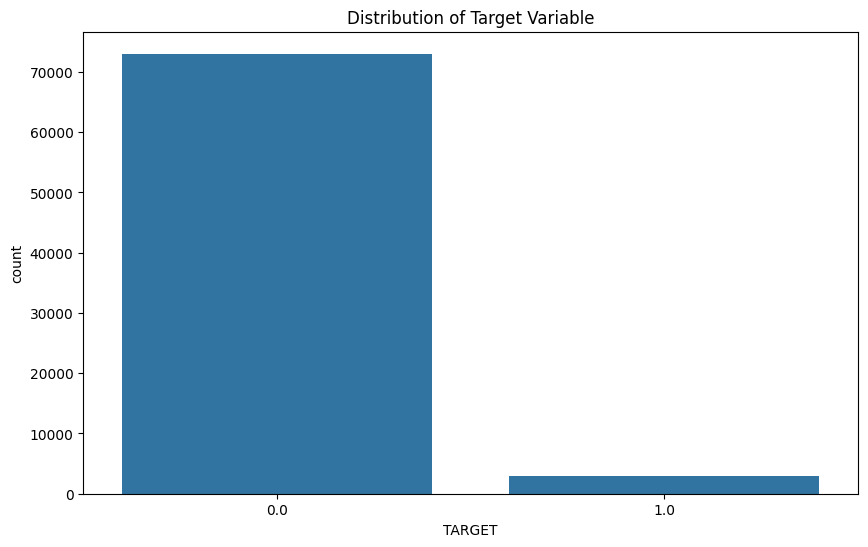

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TARGET', data=imputedDataset)
plt.title('Distribution of Target Variable')
plt.show()

In [50]:
#G
uniqueCategories = imputedDataset['TARGET'].value_counts()
print("Unique Categories:\n", uniqueCategories)

if uniqueCategories.max() / uniqueCategories.min() > 1.5:
    print("The Dataset Is ImBalanced.")
else:
    print("The Dataset Is Balanced.")

Unique Categories:
 TARGET
0.0    73012
1.0     3008
Name: count, dtype: int64
The Dataset Is ImBalanced.


In [51]:
#H
if uniqueCategories.max() / uniqueCategories.min() > 1.5:
    majorityClass = imputedDataset[imputedDataset['TARGET'] == uniqueCategories.idxmax()]
    minorityClass = imputedDataset[imputedDataset['TARGET'] == uniqueCategories.idxmin()]

    minorityUpsampled = resample(minorityClass,replace=True,
                                 n_samples=len(majorityClass),random_state=42)

    balancedDataset = pd.concat([majorityClass, minorityUpsampled])

    print("After upsampling, the dataset is now balanced.")
    print("Balanced dataset:\n", balancedDataset['TARGET'].value_counts())
else:
    balancedDataset = imputedDataset.copy()


After upsampling, the dataset is now balanced.
Balanced dataset:
 TARGET
0.0    73012
1.0    73012
Name: count, dtype: int64


In [52]:
# I
correlationMatrix = balancedDataset.corr().abs()

upper = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape), k=1).astype(bool))

highCorrelationFeatures = [column for column in upper.columns if any(upper[column] > 0.65)]

print("Selected Features Based ON Pearson Correlation:\n", highCorrelationFeatures)


Selected Features Based ON Pearson Correlation:
 ['imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult3', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var1', 'ind_var8_0', 'ind_var8', 'ind_var12', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo', 'ind_var13_medio', 'ind_var13', 'ind_var17', 'ind_var18', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var29_0', 'ind_var29', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var32_0', 'ind_var32', 'ind_var33', 'ind_var34', 'ind_var37_0', 'ind_var37', 'ind_var40_0', 'ind_var40', 'ind_var41_0', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var1_0', 'num_var1', 'num_var4', 'num_var5_0', 'num_var5', 'num_var6_0', 'num_var6', 'num_var8_0', 'num_var8', 'num_var12', 'num_var13_0', 'num_var13_cor

In [53]:
# J
X = balancedDataset.drop('TARGET', axis=1)
y = balancedDataset['TARGET']

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

selectedFeatures = X.columns[selector.get_support()]
print("Selected features using SelectKBest:\n", selectedFeatures)

selectorVar = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_var_selected = selectorVar.fit_transform(X)

selectedFeaturesVar = X.columns[selectorVar.get_support()]
print("Selected features using Variance Threshold:\n", selectedFeaturesVar)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 22  23  57  58  59  60  81  85  86 132 133 134 135 156 162 163 180 181
 190 193 221 223 235 239 245 249 262 263 304 308 316 320 328 350] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected features using SelectKBest:
 Index(['var15', 'ind_var5', 'ind_var30', 'num_var4', 'num_var5', 'num_var30',
       'num_var35', 'num_var42', 'var36', 'num_meses_var5_ult3'],
      dtype='object')
Selected features using Variance Threshold:
 Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=207)


In [54]:
#@title Task 04

#A and B

empDataset = pd.read_csv('/employee_survey.csv')
empDataset

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2070,Male,47,Married,Lead,16,Marketing,Part-Time,1,3,...,6.8,Public Transport,15,8,28,8,Master,False,58.0,1
3021,2072,Female,47,Married,Lead,8,IT,Contract,3,1,...,6.9,Car,28,8,21,8,Master,True,54.0,1
3022,2145,Male,41,Married,Lead,17,IT,Full-Time,1,1,...,6.1,Public Transport,9,6,23,3,Master,True,58.5,1
3023,2168,Female,54,Married,Lead,16,IT,Full-Time,1,5,...,7.7,Public Transport,18,10,30,7,Master,True,58.0,1


             EmpID          Age   Experience          WLB      WorkEnv  \
count  3025.000000  3025.000000  3025.000000  3025.000000  3025.000000   
mean   1513.000000    35.741818     9.082645     3.061157     3.029091   
std     873.386608    10.191833     7.073344     1.447001     1.415317   
min       1.000000    22.000000     0.000000     1.000000     1.000000   
25%     757.000000    27.000000     3.000000     2.000000     2.000000   
50%    1513.000000    34.000000     8.000000     3.000000     3.000000   
75%    2269.000000    43.000000    14.000000     4.000000     4.000000   
max    3025.000000    60.000000    29.000000     5.000000     5.000000   

       PhysicalActivityHours     Workload       Stress   SleepHours  \
count            3025.000000  3025.000000  3025.000000  3025.000000   
mean                2.029620     2.966612     1.736529     7.005983   
std                 0.966014     1.401486     1.064242     1.002652   
min                 0.000000     1.000000     1.0

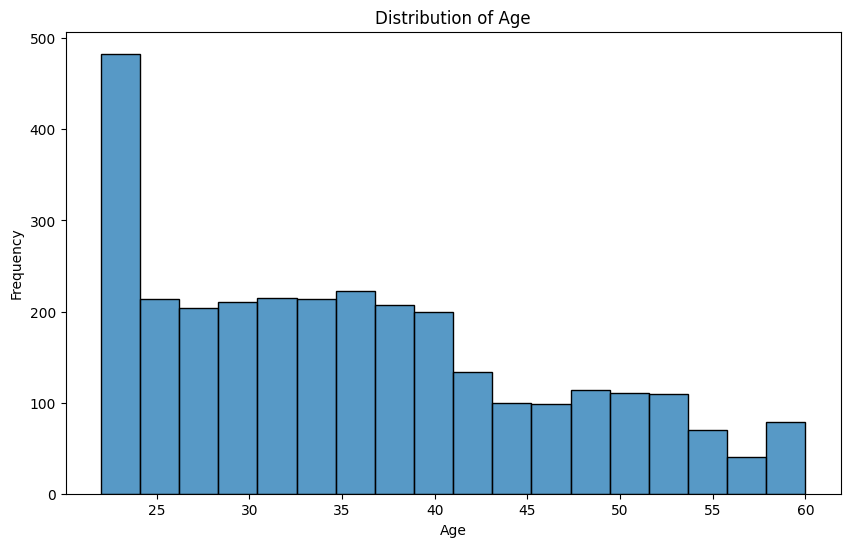

Unique Categories:
 EmpID  Gender  Age  MaritalStatus  JobLevel  Experience  Dept        EmpType    WLB  WorkEnv  PhysicalActivityHours  Workload  Stress  SleepHours  CommuteMode       CommuteDistance  NumCompanies  TeamSize  NumReports  EduLevel     haveOT  TrainingHoursPerYear  JobSatisfaction
1      Female  37   Married        Senior    5           Operations  Full-Time  5    3        2.1                    3         1       8.2         Motorbike         18               5             24        7           Bachelor     False   42.5                  5                  1
2022   Male    31   Married        Senior    9           Finance     Full-Time  5    5        1.2                    3         1       6.4         Car               8                3             23        2           Bachelor     False   44.5                  5                  1
2013   Female  29   Single         Junior    7           Marketing   Full-Time  4    5        1.7                    4         1       7.1 

In [55]:
#C

print(empDataset.describe())

plt.figure(figsize=(10, 6))
sns.histplot(empDataset['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

uniqueCategories2 = empDataset.value_counts()
print("Unique Categories:\n", uniqueCategories2)

if uniqueCategories2.max() / uniqueCategories2.min() > 1.5:
    print("The Dataset Is ImBalanced.")
else:
    print("The Dataset Is Balanced.")

In [56]:
# D

print(empDataset.isnull().sum())

empDataset['Age'] = empDataset['Age'].fillna(empDataset['Age'].mean())
empDataset['TrainingHoursPerYear'] = empDataset['TrainingHoursPerYear'].fillna(empDataset['TrainingHoursPerYear'].mode()[0])


EmpID                    0
Gender                   0
Age                      0
MaritalStatus            0
JobLevel                 0
Experience               0
Dept                     0
EmpType                  0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteMode              0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
EduLevel                 0
haveOT                   0
TrainingHoursPerYear     0
JobSatisfaction          0
dtype: int64


In [60]:
#E

if uniqueCategories2.max() / uniqueCategories2.min() > 1.5:
    majorityClass = empDataset[empDataset['Age'] == uniqueCategories2.idxmax()]
    minorityClass = empDataset[empDataset['Age'] == uniqueCategories2.idxmin()]

    minorityUpsampled = resample(minorityClass,replace=True,
                                 n_samples=len(majorityClass),random_state=42)

    balancedDataset = pd.concat([majorityClass, minorityUpsampled])

    print("After upsampling, the dataset is now balanced.")
    print("Balanced dataset:\n", balancedDataset.value_counts())
else:
    balancedDataset = imputedDataset.copy()
    print("Balanced dataset:\n", empDataset.value_counts())

Balanced dataset:
 EmpID  Gender  Age  MaritalStatus  JobLevel  Experience  Dept        EmpType    WLB  WorkEnv  PhysicalActivityHours  Workload  Stress  SleepHours  CommuteMode       CommuteDistance  NumCompanies  TeamSize  NumReports  EduLevel     haveOT  TrainingHoursPerYear  JobSatisfaction
1      Female  37   Married        Senior    5           Operations  Full-Time  5    3        2.1                    3         1       8.2         Motorbike         18               5             24        7           Bachelor     False   42.5                  5                  1
2022   Male    31   Married        Senior    9           Finance     Full-Time  5    5        1.2                    3         1       6.4         Car               8                3             23        2           Bachelor     False   44.5                  5                  1
2013   Female  29   Single         Junior    7           Marketing   Full-Time  4    5        1.7                    4         1       7.1  

In [61]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [64]:
#F

targetColumns = ['EmpID','Gender','MaritalStatus','JobLevel','Dept','EmpType','PhysicalActivityHours','CommuteMode','EduLevel','haveOT']
X = empDataset.drop(columns=targetColumns)
y = empDataset['JobSatisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()

rfe = RFE(estimator=model, n_features_to_select=10)

rfe.fit(X_train, y_train)

ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]

print("Selected Features:", selected_features)
print("Feature Rankings:", ranking)


Selected Features: Index(['Age', 'Experience', 'WLB', 'WorkEnv', 'Workload', 'SleepHours',
       'CommuteDistance', 'TeamSize', 'TrainingHoursPerYear',
       'JobSatisfaction'],
      dtype='object')
Feature Rankings: [1 1 1 1 1 2 1 1 3 1 4 1 1]


In [66]:
#G

encodedDataset = pd.get_dummies(empDataset,columns=targetColumns,drop_first=True)
print(encodedDataset)

#Dummy Encoding is typically used in linear models or when you want to avoid multicollinearity.
#One-Hot Encoding is often used in tree-based models or neural networks where multicollinearity is less of an issue, and the model can handle the full set of categories.

      Age  Experience  WLB  WorkEnv  Workload  Stress  SleepHours  \
0      32           7    1        1         2       1         7.6   
1      34          12    1        1         2       2         7.9   
2      23           1    2        4         5       4         6.5   
3      29           6    2        2         3       1         7.5   
4      23           1    3        1         2       1         4.9   
...   ...         ...  ...      ...       ...     ...         ...   
3020   47          16    1        3         4       3         6.8   
3021   47           8    3        1         2       1         6.9   
3022   41          17    1        1         1       1         6.1   
3023   54          16    1        5         3       3         7.7   
3024   44          22    3        3         3       5         6.2   

      CommuteDistance  NumCompanies  TeamSize  ...  PhysicalActivityHours_4.9  \
0                  20             3        12  ...                      False   
1        

In [67]:
#H

duplicateCount = empDataset.duplicated().sum()
print("Number of duplicate records:", duplicateCount)

dataNoDuplicates = empDataset.drop_duplicates()
print("Number of records after removing duplicates:", len(dataNoDuplicates))

dataFirstOccurrence = empDataset.drop_duplicates(keep='first')
print("Number of records after keeping only the first occurrence:", len(dataFirstOccurrence))


Number of duplicate records: 0
Number of records after removing duplicates: 3025
Number of records after keeping only the first occurrence: 3025
